# Data Processing

In [5]:
### Multilateral Development Institution Data
foo <- read.csv("https://tinyurl.com/yb4phxx8") # read in the data

# column names
names(foo)

# dimensions of the data set
dim(foo)

# quick look at the data structure
head(foo)

# take note of the columns representing calendar dates
date.columns <- c(11 , 12 , 14 , 15 , 16 , 17 , 18 , 25)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

[1] 9016   25

Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5001,Financially Completed,,R,RETA,REG,,,"Agriculture, natural resources and rural development",0,...,1987-12-31,,1987-12-31,NA,2,0.155,NA,,,
1,Financially Completed,,,ADTA,INO,,,"Agriculture, natural resources and rural development",0,...,1968-07-31,,1968-07-31,NA,2,0.080,NA,,,
2,Financially Completed,,,ADTA,KOR,,,"Agriculture, natural resources and rural development",0,...,1969-10-31,,1969-10-31,NA,2,0.067,NA,,,
3,Financially Completed,,,ADTA,PHI,,,"Agriculture, natural resources and rural development",0,...,1970-01-31,,1970-01-31,NA,2,0.105,NA,,,
4,Financially Completed,,,ADTA,VIE,,,Finance,0,...,1972-08-31,,1972-08-31,NA,2,0.115,NA,,,
5,Financially Completed,,,PPTA,PHI,,,Transport,0,...,1970-03-31,,1970-03-31,NA,2,0.325,NA,,,


In [6]:
for(i in date.columns)  # this "for loop" only loops through the "date.columns" -- no other columns.
  
{
    # Find missing values
    which_values_are_missing <- which(as.character(foo[, i]) == "")
    
    # Replace them by NAs
    foo[which_values_are_missing, i] <- NA
    
    # Turn values into dates
    foo[, i] <- as.Date(as.character(foo[, i]))
  
}

In [7]:
# Try this yourself

foo[3,12]
# [1] "1968-03-13"

foo[4,12]
# [1] "1968-07-03"

foo[3,12] - foo[4,12]
# Time difference of -112 days

[1] "1968-03-13"

[1] "1968-07-03"

Time difference of -112 days

In [10]:
# If you want to remove NAs for a given column ...
which.have.NAs <- which(is.na(foo$Rating == TRUE))

new_foo <- foo[-which.have.NAs, ]

In [11]:
noNA_foo <- new_foo[!is.na(new_foo$CirculationDate), ]
df <- noNA_foo[which(noNA_foo$CirculationDate >= as.Date("2009-01-01")), ]

# Check:
summary(df$CirculationDate)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2009-01-14" "2011-07-21" "2014-02-03" "2013-12-02" "2016-06-17" "2018-06-29"

# Question 1

(1) When projects are approved, they are approved for a certain period (until the time of “original completion date”). While projects are active, this “original” completion date is often extended, and then there is a “revised” completion date. You have been told that project duration at approval is generally about two years (24 months). In other words, (purportedly) when  projects are approved, the difference between the original project completion date and the approval date is (supposedly) approximately 24 months.


(a) Is this claim true? Explain.

In [23]:
mask <- which(is.na(df$OriginalCompletionDate)) #creates object mask to return the position of the elements in which there
#are missing values of original completion dates

df_withDates <- df[-mask,] #leaves in the dataframe only elements that have original completion dates

expected_duration <- mean(df_withDates$OriginalCompletionDate) - mean(df_withDates$ApprovalDate) #calculates the difference
#between mean original completion date and mean approval date disregarding the projects with missing values

expected_duration #calls the time difference in days

Time difference of 650.9313 days

*ANSWER*: 

False. Dividing 650.9313 by 365, we would get 1.78 years as the mean time for project duration, which is lower than the 2 years proposed by the claim. Possibly the true mean could be closer to two years if we had data for the projects that are missing original completion date.






(b) Has the length of project delay, measured as the difference between “OriginalCompletionDate” and “RevisedCompletionDate”, changed over time (consider projects circulated earlier and circulated later)? You will need to make a choice of how to deal
with missing information, which you should explicitly discuss. Be sure to also discuss mean delays, median delays, and the interquartile range of delays (using the “quantile” function). Approximate suggested length: 3-5 sentences.


In [28]:
# Circulation year column
df_withDates$CirculationYear <- format(df_withDates$CirculationDate, "%Y")

sum(is.na(df_withDates$RevisedCompletionDate))  #Shows that there are no missing information in the rows of Revised Completion
#Date when the output is 0

# Delay column
df_withDates$Delay <- df_withDates$RevisedCompletionDate - df_withDates$OriginalCompletionDate 


[1] 0

In [29]:
#I am copying the solution provided by the code key to get information about the the means, medians and interquantile ranges
library(dplyr)  
delayByYear <- df_withDates %>%  # %>% means "pass what is to the left to the function that follows"
  group_by(CirculationYear) %>%    
  summarise(mean.delay = mean(Delay), 
            median.delay = median(Delay),
            IQR.delay = quantile(Delay, 0.75) - quantile(Delay, 0.25))
delayByYear

CirculationYear,mean.delay,median.delay,IQR.delay
2009,657.7644 days,549.0 days,610.00 days
2010,634.0000 days,547.0 days,511.25 days
2011,584.7664 days,426.0 days,610.00 days
2012,538.2390 days,487.0 days,409.50 days
2013,503.5893 days,396.0 days,493.00 days
2014,520.1750 days,457.0 days,396.25 days
2015,626.9821 days,442.0 days,677.25 days
2016,529.3702 days,366.0 days,518.00 days
2017,540.1632 days,456.0 days,545.75 days
2018,566.1905 days,365.5 days,418.50 days


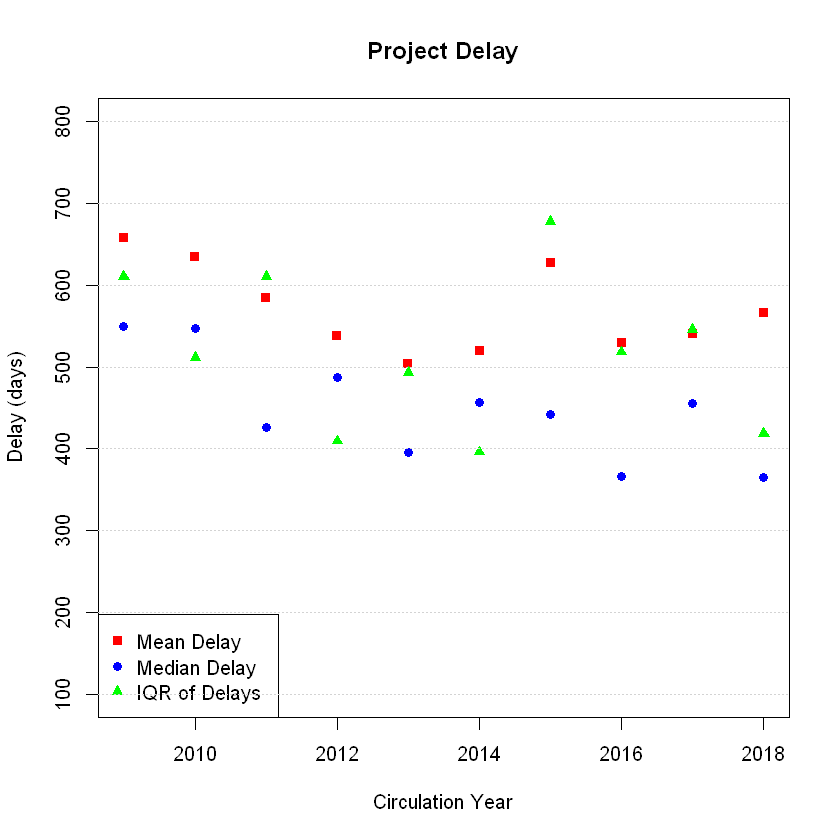

In [35]:
#Plotting

plot(delayByYear$CirculationYear, delayByYear$mean.delay, 
     pch=15, col="red", ylim=c(100, 800), 
     xlab="Circulation Year", ylab="Delay (days)", main="Project Delay")
points(delayByYear$CirculationYear, delayByYear$median.delay, pch=16, col="blue")
points(delayByYear$CirculationYear, delayByYear$IQR.delay, pch=17, col="green")
legend("bottomleft", pch=c(15,16,17), 
       col=c("red","blue","green"), 
       legend=c("Mean Delay", "Median Delay", "IQR of Delays"))
grid(nx=NA, ny=NULL)

*Answer*:

Project delays fluctuated from 2009 to 2018. The highest mean delay was in 2009, with 657 days, and the lowest in 2013 with 503 days. There is no observable trend by looking at the data points in the figure.

The median also fluctuates. Furthermore, it's lower than the mean in every year, which means that the dataset has more outliers in the high end of the distribution (positively skewed).

The interquartile range is the difference between the first (25%) and third (75%) quartile. It shows where the bulk of the values lie. The IQR is also following a similar fluctuating trend to the mean

(c) How does the original planned project duration differ from actual duration (if the actual duration is measured as the duration between “ApprovalDate” and “RevisedCompletionDate”)? Once again, use means, medians, and interquartile ranges to explain your results. Approximate suggested length: 3-5 sentences.

In [48]:
# Actual duration measured as difference between approval date and revised completion date
df_withDates$ActualDuration <- df_withDates$RevisedCompletionDate - df_withDates$ApprovalDate

# Actual duration statistics
mean(df_withDates$ActualDuration) 
median(df_withDates$ActualDuration)
quantile(df_withDates$ActualDuration)
IQR(df_withDates$ActualDuration) 
range(df_withDates$ActualDuration)

Time difference of 1220.019 days

Time difference of 1120.5 days

Time differences in days
     0%     25%     50%     75%    100% 
  56.00  838.25 1120.50 1482.75 4395.00 

[1] 644.5

Time differences in days
[1]   56 4395

In [50]:
#Expected duration measured as the difference between approval date and the original expected duration date
df_withDates$ExpectedDuration <- df_withDates$OriginalCompletionDate - df_withDates$ApprovalDate

#Expected duration statistics
mean(df_withDates$ExpectedDuration)
median(df_withDates$ExpectedDuration) 
quantile(df_withDates$ExpectedDuration) 
IQR(df_withDates$ExpectedDuration)
range(df_withDates$ExpectedDuration)

Time difference of 650.9313 days

Time difference of 599.5 days

Time differences in days
     0%     25%     50%     75%    100% 
  18.00  406.25  599.50  792.00 3369.00 

[1] 385.75

Time differences in days
[1]   18 3369

*Answer*:

From the data, we can infer that projects take longer to be approved than originally planned.  Both means and medians are higher in actual duration compared to expected duration: 1220 > 650 and 1120 > 599.

Supporting evidence can be seen when we look at quantiles. This shows that most of the data for actual duration is spread between 1428 and 838, which are higher upper and lower bounds than the ones for expected duration (792 and 406).

Interestingly, we can also infer that time difference is more spread out for actual duration than expected: Both range and IQR are higher. A possible reason for this might be that when the institution approves a project, they are more optimistic regarding completion date, but as the date gets revised, new confounding variables come into play that might delay the completion, creating a bigger spread of time differences for actual duration.

# Question 2

(2) What % of projects completed between 2010 and now were rated 0? What % over the same time period were rated 1? What % were rated 2? What % were rated 3? Answer these questions using a table or a figure. Provide a title and an explanatory sentence or two that provides the numerical % results rounded to the nearest percentage point.

In [58]:
# Creates a variable with number of projects completed between 2010 and now
df2010 <- noNA_foo[which(noNA_foo$RevisedCompletionDate >= as.Date("2010-01-01")), ] #Changed the critical variable to
#RevisedCompletionDate

print("Distribution of Project Ratings") #prints the title
prop.table(table(df2010$Rating)) *100  #prints table where the first row corresponds to rating and the second row with 
# the percentages



[1] "Distribution of Project Ratings"



        0         1         2         3 
 2.124312 11.487018 72.147915 14.240755 

*Answer*:

2% received a rating of 0; 11.4% received a rating of 1; 72% received rating of 2; 14% received a rating of 3. Therefore, the majority received a 2 rating.

# Question 3

Repeat problem 2, but this time limit your analysis purely to policy and advisory technical assistance (”PATA”) projects.


In [60]:
# Selecting only PATA projects from the variable created in the cell above
df_PATA <- df2010[which(df2010$Type == "PATA"),]

print("Distribution of Project Ratings (PATA only)") #prints the title
table(df_PATA$Rating) / length(df_PATA$Rating) * 100  #prints the table

[1] "Distribution of Project Ratings (PATA only)"



        0         1         2         3 
 1.098901  8.058608 72.161172 18.681319 

*Answer*:

1% received a rating of 0; 8% received a rating of 1; 72% received a rating of 2, 18.6% received a rating of 3. PATA has a similar percentage for rating 2, but higher for 3 and lower for 0 and 1.

# Question 4

Identify the top 10% of projects by “Revised.Amount” and the bottom 10% of projects by “RevisedAmount” (“RevisedAmount” shows the final project budget). Compare the ratings of these projects. Can you draw a causal conclusion about the effect of budget
size on ratings? Why or why not? Hint: Compare the characteristics of the two project groupings, e.g., “Dept,” “Division,” “Cluster,” “Country.” Approximate suggested length: 3-5 sentences.


In [69]:
# Creates the two new dataframes for top and bottom ratings by revised amount.
df_TopQuant <- df[which(df$RevisedAmount >= quantile(df$RevisedAmount, 0.9)),]
df_BottomQuant <- df[which(df$RevisedAmount <= quantile(df$RevisedAmount, 0.1)),]

#Gets the descriptive stats for the top 10%
mean(df_TopQuant$Rating)
median(df_TopQuant$Rating)
sd(df_TopQuant$Rating)

#Gets the descriptive stats for the bottom 10%
mean(df_BottomQuant$Rating)
median(df_BottomQuant$Rating)
sd(df_BottomQuant$Rating)

[1] 1.97619

[1] 2

[1] 0.5785837

[1] 2.011194

[1] 2

[1] 0.5641155

In [70]:
# Compares the rates in percentage
(table(df_TopQuant$Rating) / length(df_TopQuant$Rating) * 100) - 
  (table(df_BottomQuant$Rating) / length(df_BottomQuant$Rating) * 100)


        0         1         2         3 
 1.261549 -1.226013  2.167733 -2.203269 

In [71]:
# Compares the count with "Dept" feature
table(df_TopQuant$Dept) - table(df_BottomQuant$Dept)
# More projects in the top quantile are within the SDCC, whereas
# more projects in the bottom  quantile are in the SERD, ERCD and SARD departments.


             AED*      AGD     AGDX     ARDD      AWD     AWD*     BDCO 
       0        0        0        0        0        0        0        0 
    BPMS     CPSO     CRPN      CTL     CWRD      DOC     EARD   ECRD** 
       0        0        0       -2        1        0       -6       -1 
    ERCD     IDBD      IED      IFD     IRDD      IWD     MKRD      OAG 
     -19        0        0        0        0        0        0        0 
     OAI      OCO     OCRP     OESD      OGC     OOMP      OPO     OPPP 
      -2       -1       -2        0        0        0        0        0 
    OREI      ORM     PARD     PPFD      PSD      PSG     PSOD      RMU 
      -6        0       -8       -3        0        0      -10        0 
    SARD     SDCC     SERD   SERD** SFSP-AUS      SPD       TD     VPO1 
     -27       10      -20        0        0       -2       -2        0 
    VPPC      VPW 
       0        0 

In [72]:
# Compares the "Cluster" feature
(table(df_TopQuant$Cluster) / length(df_TopQuant$Cluster) * 100) - 
  (table(df_BottomQuant$Cluster) / length(df_BottomQuant$Cluster) * 100)


                     14          15          16          17          18 
-1.92786070  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
         19          20          21          22          23          24 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
         25          26          27          28          29          30 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
       C001        C002        C003        C004        C005        C006 
 0.00000000  0.59523810 -0.07995736  0.00000000  0.00000000  0.22210377 
       C007        C008        C009        C010        C011        C012 
 0.00000000  0.00000000  1.19047619  0.00000000  0.00000000  0.00000000 
       C013 
 0.00000000 

In [73]:
# Compares the "Country" feature
(table(df_TopQuant$Country) / length(df_TopQuant$Country) * 100) - 
  (table(df_BottomQuant$Country) / length(df_BottomQuant$Country) * 100)



        AFG         ARM         AZE         BAN         BHU         BRU 
 2.60305615  0.00000000  0.00000000 -5.22388060 -1.11940299  0.00000000 
        CAM         COO         FIJ         FSM         GEO         IND 
-2.54086709 -0.37313433 -0.37313433 -0.74626866 -1.11940299  4.14889837 
        INO         KAZ         KGZ         KIR         KOR         LAO 
 0.73738451 -0.37313433 -1.49253731  0.22210377  0.00000000  0.07107321 
        MAL         MLD         MON         MYA         NAU         NEP 
-0.37313433  0.59523810  0.66631130 -0.75515281 -1.49253731 -0.82622601 
        PAK         PAL         PHI         PNG         PRC         REG 
 3.34044065  0.00000000 -0.38201848 -0.52416489 -1.94562900 11.24733475 
        RMI         SAM         SIN         SOL         SRI         TAJ 
-0.74626866  0.00000000  0.00000000 -0.15103056 -1.49253731 -0.37313433 
        TAP         THA         TIM         TKM         TON         TUV 
 0.00000000 -2.23880597  0.22210377 -0.37313433  0

*Answer*:

We cannot draw a causal conclusion about the effect of budget size on rating because we cannot observe any statistically significant difference between samples. The differences between the top 10% and bottom 10% are around 2% when we compare the rates, which is very small. Furthermore, even if there is a slight difference, the standard deviation for both is high (over 0.55), which can possibly justify the difference between sample means.

A causal inference is a comparison of potential outcomes for a given unit. Because the samples here don't represent the same unit --we would need the same type of projects with variations in budget to evaluate ratings-- we are incapable of drawing causal conclusions.

Even if we can see differences when analyzing other characteristics (as we could with Country and Cluster), those other characteristics still inhibit us from causal inference as forementioned. Also, the data is observational, so it's unbalanced across treatment and control group.



# Question 5

Imagine your manager asks you to apply Jeremy Howard’s drivetrain model to the problem of optimal budget-setting to minimize project completion delays (i.e., the difference between revised and original completion dates). In such a situation, what would be the:

(a) Decision problem or objective?

*Answer*: How can we minimize the completion delay of projects?


(b) Lever or levers?

*Answer*: 1. Budget allocation; 2. Original completion date set


(c) Ideal RCT design?

*Answer*: In the ideal design we would have very similar projects, and then divide them randomly into two groups (control and test). For the test group we can allocate budget randomly, and for the control group we can use historical data to set the average budget. In doing so, we are making budget comparable because characteristics will start overlapping. Lastly, we would want to measure the difference in ratings. Furthermore, it's unlikely that two projects will have exact same values for all variables, so we would try to study those that have different variables which are as close as possible.


(d) Dependent variable(s) and independent variable(s) in the modeler?

*Answer:* The dependent variable will be delay (measured as the difference between revised and original completion dates). The independent variable will be budget allocated
 
 
(e) Why would running RCTs and modeling/optimizing over RCT results be preferable to
using (observational, non-RCT) “foo” data?

*Answer*: RCTS are the most effective method for evaluating relationships between independent and dependent variables. When we randomly assign to groups we are mitigating selection and sample bias, that is, choosing projects that might have characteristics the researcher belives will have ideal results. Furthermore, by choosing projects with the same characteristics, we are comparing the same unit with different variations in the independent variable, which is impossible in observational data due to confounding variables (other unnacounted variables that can affect our dependent variable).

